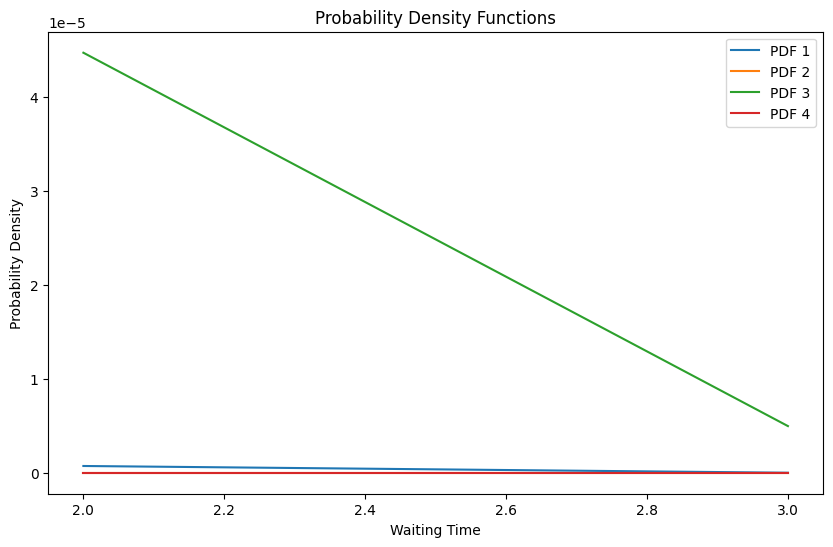

Probability of waiting between 2 and 4 hours (PDF 1): 0.0000
Probability of waiting between 2 and 4 hours (PDF 2): 0.0000
Probability of waiting between 2 and 4 hours (PDF 3): 0.0000
Probability of waiting between 2 and 4 hours (PDF 4): 0.0000


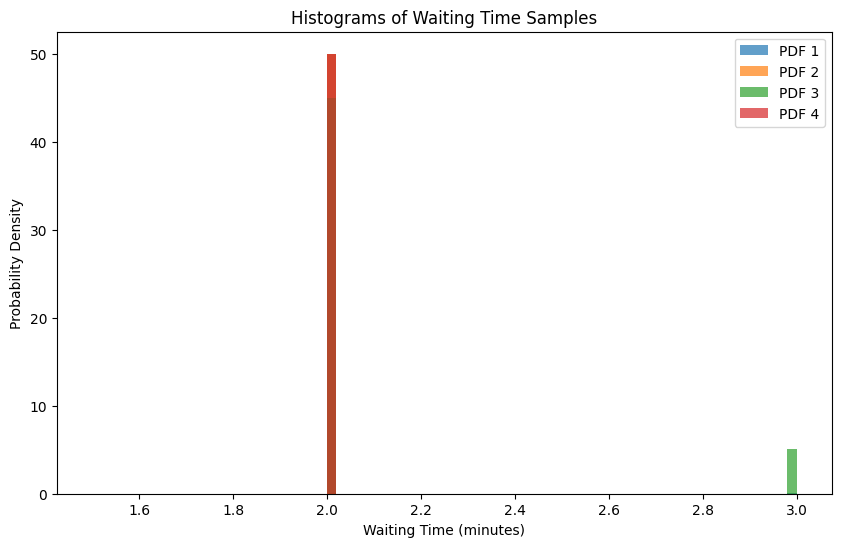

In [3]:
# Task 2: Basic Probabilities and Visualizations (2)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the probability density functions to wait to hear the owl
def pdf_1(y, params):
    return params[1] * np.exp(-params[2] * y) + params[3] * np.exp(-params[4] * y)

def pdf_2(y, params):
    return params[1] * np.exp(-params[2] * (y**2)) + params[3] * np.exp(-params[4] * (y**8))

def pdf_3(y, params):
    return params[1] * np.exp(-params[2] * np.sqrt(y)) + params[3] * np.exp(-params[4] * (y**(1/3)))

def pdf_4(y, params):
    return params[1] * np.exp(-params[2] * (y**2) + params[3] * np.exp(-params[4] * (y**2)))

# Define the range of waiting times
y = np.arange(2, 4, 1)

# Set your parameter values
params = [2,0.86, 7, 0.13, 9]

# Calculate the probability density functions for each case
pdf_v_1 = pdf_1(y, params)
pdf_v_2 = pdf_2(y, params)
pdf_v_3 = pdf_3(y, params)
pdf_v_4 = pdf_4(y, params)

# Plot the probability density functions
plt.figure(figsize=(10, 6))
plt.plot(y, pdf_v_1, label='PDF 1')
plt.plot(y, pdf_v_2, label='PDF 2')
plt.plot(y, pdf_v_3, label='PDF 3')
plt.plot(y, pdf_v_4, label='PDF 4')
plt.title('Probability Density Functions')
plt.xlabel('Waiting Time')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Integrate to find the cummulative distribution function that you need to wait between 2 and 4 hours
probability_1, _ = quad(pdf_1, 2*60, 4*60, args=(params,))
probability_2, _ = quad(pdf_2, 2*60, 4*60, args=(params,))
probability_3, _ = quad(pdf_3, 2*60, 4*60, args=(params,))
probability_4, _ = quad(pdf_4, 2*60, 4*60, args=(params,))

print(f"Probability of waiting between 2 and 4 hours (PDF 1): {probability_1:.4f}")
print(f"Probability of waiting between 2 and 4 hours (PDF 2): {probability_2:.4f}")
print(f"Probability of waiting between 2 and 4 hours (PDF 3): {probability_3:.4f}")
print(f"Probability of waiting between 2 and 4 hours (PDF 4): {probability_4:.4f}")

# Generate random samples and create histograms
samples_1 = np.random.choice(y, size=10000, p=pdf_v_1/np.sum(np.nan_to_num(pdf_v_1)))
samples_2 = np.random.choice(y, size=10000, p=pdf_v_2/np.sum(np.nan_to_num(pdf_v_2)))
samples_3 = np.random.choice(y, size=10000, p=pdf_v_3/np.sum(np.nan_to_num(pdf_v_3)))
samples_4 = np.random.choice(y, size=10000, p=pdf_v_4/np.sum(np.nan_to_num(pdf_v_4)))

plt.figure(figsize=(10, 6))
plt.hist(samples_1, bins=50, density=True, alpha=0.7, label='PDF 1')
plt.hist(samples_2, bins=50, density=True, alpha=0.7, label='PDF 2')
plt.hist(samples_3, bins=50, density=True, alpha=0.7, label='PDF 3')
plt.hist(samples_4, bins=50, density=True, alpha=0.7, label='PDF 4')
plt.title('Histograms of Waiting Time Samples')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

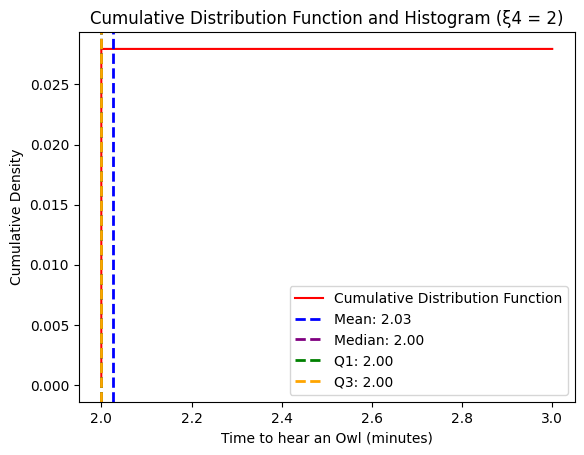

In [4]:
# Combine all samples into one array
samples = np.concatenate([samples_1, samples_2, samples_3, samples_4])
pdf = np.concatenate([pdf_v_1,pdf_v_2,pdf_v_3,pdf_v_4])

fig, ax = plt.subplots()

# Combine all samples into one array
all_samples = np.concatenate([samples_1, samples_2, samples_3, samples_4])
all_pdf = np.concatenate([pdf_v_1, pdf_v_2, pdf_v_3, pdf_v_4])

# Sort the combined samples for plotting the cumulative distribution function (CDF)
sorted_samples = np.sort(all_samples)

# Calculate the cumulative distribution function (CDF)
cdf = np.cumsum(all_pdf[sorted_samples - y.min()])  # Adjust indices to start from y.min()

# Plot the cumulative distribution function (CDF)
ax.plot(sorted_samples, cdf, label="Cumulative Distribution Function", color='red')

# Calculate mean, variance, and quartiles of waiting times
mean_waiting_time = np.mean(all_samples)
variance_waiting_time = np.var(all_samples)
q1, median, q3 = np.percentile(all_samples, [25, 50, 75])

# Display mean, variance, and quartiles in the plot
ax.axvline(mean_waiting_time, color="blue", linestyle="dashed", linewidth=2, label=f'Mean: {mean_waiting_time:.2f}')
ax.axvline(median, color="purple", linestyle="dashed", linewidth=2, label=f'Median: {median:.2f}')
ax.axvline(q1, color="green", linestyle="dashed", linewidth=2, label=f'Q1: {q1:.2f}')
ax.axvline(q3, color="orange", linestyle="dashed", linewidth=2, label=f'Q3: {q3:.2f}')

# Display the plot
plt.title(f'Cumulative Distribution Function and Histogram (ξ4 = {params[0]})')
plt.xlabel("Time to hear an Owl (minutes)")
plt.ylabel("Cumulative Density")
plt.legend()
plt.show()